In [1]:
# Import required libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Rating.csv')

In [3]:
data

,Unnamed: 0,Review,Rating
0,0,A bit expensive when we compare with today's i...,4
1,1,Fantastic value for money machine!! Absolute b...,5
2,2,"The best you can get, looks and performance bo...",5
3,3,"Ultimate machine, best laptop I have ever used...",5
4,4,"For everyone, who is planning to buy MBA M1-\n...",5
...,...,...,...
25554,25554,Good Mobile in this range,3
25555,25555,good,3
25556,25556,Camera low light conditions 😥\nface id and fin...,3
25557,25557,camera quality is average,3


In [4]:
# Droping 'Unnamed: 0'
data.drop('Unnamed: 0', axis=1 , inplace= True)

In [5]:
data.shape

(25559, 2)

Data is having 20359 Rows and 3 columns.   
Review and Rating are relevent But Unnamed:0 is not relevent to analysis.  
In next step we will drop the Unnamed: 0 from our data.  

In [6]:
data.head(6)

,Review,Rating
0,A bit expensive when we compare with today's i...,4
1,Fantastic value for money machine!! Absolute b...,5
2,"The best you can get, looks and performance bo...",5
3,"Ultimate machine, best laptop I have ever used...",5
4,"For everyone, who is planning to buy MBA M1-\n...",5
5,At the current scenario where a proper Graphic...,5


In [7]:
data.sample(10)

,Review,Rating
8308,Good ultra fast charging,5
22101,Bad phone,1
3761,Good,5
19196,Good,4
24916,average,3
15855,Nice one,5
24325,ok... budget phone ..,3
11180,Good I am satisfied before timely delivered,5
5124,Not much satisfaction with product and install...,2
6692,Nice,4


In [8]:
print("In the dataset \nNumber of columns=",data.shape[1],'\nNumber of Rows=',data.shape[0],'\nName of columns=',data.columns.values)

In the dataset 
Number of columns= 2 
Number of Rows= 25559 
Name of columns= ['Review' 'Rating']


In [9]:
#checking if there is any duplicated values in training dataset
print('Number of duplicated values:-',data.duplicated().sum())

Number of duplicated values:- 6546


In [10]:
data[data.duplicated()]

,Review,Rating
30,"This is truly a mean machine, l was in a mind ...",5
31,The M1 macbook air is the best value for money...,5
32,"This machine is beast with M1 chip, monster fa...",5
33,Battery is amazing\nlaptop gets a bit warm whi...,4
34,"Migrated from 2016 MacBook Air. Brand new, sea...",5
...,...,...
25554,Good Mobile in this range,3
25555,good,3
25556,Camera low light conditions 😥\nface id and fin...,3
25557,camera quality is average,3


Data is having 6546 Dulicate values, Before going into further analysis, we will drop these duplicated values from our data.

In [11]:
# Lets make backup copy for the data 
df=data.copy()

In [12]:
# Droping duplicates from the data set df
df.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
df

,Review,Rating
0,A bit expensive when we compare with today's i...,4
1,Fantastic value for money machine!! Absolute b...,5
2,"The best you can get, looks and performance bo...",5
3,"Ultimate machine, best laptop I have ever used...",5
4,"For everyone, who is planning to buy MBA M1-\n...",5
...,...,...
19008,camera quality n battery back up is below average,3
19009,over all ok,3
19010,Good Mobile in this range,3
19011,Camera low light conditions 😥\nface id and fin...,3


In [14]:
# Lets again check the duplicates present in the df
df[df.duplicated()]

,Review,Rating


Now data is not having any duplicate values.  

In NLP pipeline we follows the various steps to make our final model. These steps includes text prepration, vectorization   
Model building. In our project we will follow the follwing pipeline to make our project.  


1. Read dataset and make it in proper format.  
2. Encode the lables  
3. Convert all the cases to lower cases  
4. Remove punctuation  
5. Remove stopwords  
6. Check stats of the massages  
7. Convert all the texts into vector   
8. import classifiers  
9. Train and Test  
10. Chech the accuracy/ confusion matrix.  

So from 1 to 7 it is all about preprocessing of the data.  After that 8 to 10 are model building stages.  

Text(0, 0.5, 'Value Counts')

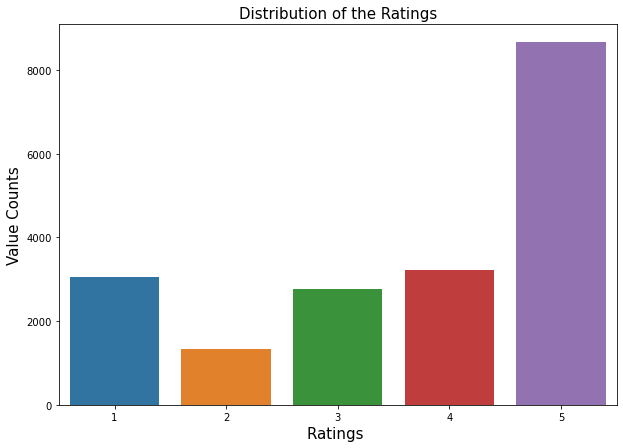

In [15]:
# Let's see how our Target column is distributed
plt.figure(figsize=(10,7))
sns.countplot(df['Rating'])
plt.title('Distribution of the Ratings', fontsize=15)
plt.xlabel('Ratings ', fontsize=15)
plt.ylabel('Value Counts', fontsize=15)

In [16]:
# Lets make new columns for for review length
df['length']= df.Review.str.len()

In [17]:
df.head()

,Review,Rating,length
0,A bit expensive when we compare with today's i...,4,498
1,Fantastic value for money machine!! Absolute b...,5,499
2,"The best you can get, looks and performance bo...",5,334
3,"Ultimate machine, best laptop I have ever used...",5,183
4,"For everyone, who is planning to buy MBA M1-\n...",5,500


In [18]:
# Lets convert all the reviews into lowercase 
df['Review']=df['Review'].str.lower()

In [19]:
df.head()

,Review,Rating,length
0,a bit expensive when we compare with today's i...,4,498
1,fantastic value for money machine!! absolute b...,5,499
2,"the best you can get, looks and performance bo...",5,334
3,"ultimate machine, best laptop i have ever used...",5,183
4,"for everyone, who is planning to buy mba m1-\n...",5,500


We Can see all the Reviews are converted into lowercase

In [20]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     ' ')

# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      ' ')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'Z|\$', ' ')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      ' ')


# Replace numbers with 'numbr'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', ' ')

# Remove punctuation
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Review'] = df['Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Review'] = df['Review'].str.replace(r'^\s+|\s+?$', '')

In [21]:
df.head(5)

,Review,Rating,length
0,a bit expensive when we compare with today s i...,4,498
1,fantastic value for money machine absolute bea...,5,499
2,the best you can get looks and performance bot...,5,334
3,ultimate machine best laptop i have ever used ...,5,183
4,for everyone who is planning to buy mba m pros...,5,500


In [22]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','n'])

df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [23]:
# New column (clean_length) after puncuation, stopword removal
df['clean_length']=df.Review.str.len()
df.head()

,Review,Rating,length,clean_length
0,bit expensive compare today intel th gen amd r...,4,498,296
1,fantastic value money machine absolute beast f...,5,499,342
2,best get looks performance notch supreme batte...,5,334,200
3,ultimate machine best laptop ever used hands m...,5,183,136
4,everyone planning buy mba pros blazing fast ah...,5,500,330


In [24]:
# Funtion to remove any emoji present in the text 
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
df['Review'] = df['Review'].apply(remove_emoji)

In [26]:
# Impoting TextBlob to correct any spelling   mistake
from textblob import TextBlob

In [27]:
#Making Function with name Correct for spelling check 
def Correct(text):
    textBlb = TextBlob(text)

    return textBlb.correct().string

In [28]:
#Now applysing correct funtion to the review columns
df['Review'] = df['Review'].apply(Correct)

In [29]:
#CREATING A FUNCTION TO PERFORM ASERIES OF OPERATIONS

def preprocess(text):
    processed=[]
    lower=text.lower().replace(r'\n'," ").replace(r'^.+@[^\.].*\.[a-z]{2,}$',' ').replace(r'^http://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',' ')
    #converting to lower case and replacing mail id,links by white space
    
    text=lower.replace(r'\s+', ' ').replace(r'\d+(\.\d+)?', ' ')
    #removing \n,large white space and leading_trailing white spaces, numbers by white space
    
    text=lower.replace(r"[^a-zA-Z]+", " ").replace(r"—"," ").replace(r'“', ' ').replace(r'”',' ').replace('’',' ').replace(r'–',' ').replace('«', ' ').replace('»',' ')
    text=text.replace('®',' ').replace('´',' ').replace('·',' ').replace('½',' ').replace('¾',' ').replace('¤',' ')
    #removing special characters by single white space
    
   
   
    punct=text.translate(str.maketrans('', '', p))  #remove punctuation
    digit=punct.translate(str.maketrans('', '', d))       #remove digits if any
    word= wt(digit, "english")
    
    for i in word:
        if i not in stop_words and len(i)>=3 and len(i)<12:
            lemma=porter().stem(wl().lemmatize(i))
           # lemma=wl().lemmatize(i)
            #stem=porter.stem(lemma)
            processed.append(lemma)
    return (" ".join([x for x in processed])).strip()

In [30]:
from collections import Counter
from string import digits as d, punctuation as p
from nltk.tokenize import word_tokenize as wt
from nltk.stem import WordNetLemmatizer as wl, PorterStemmer as porter
from gensim import corpora

In [31]:
#TESTING THE FUNCTION CREATED ABOVE
sample=" As much as human rights and ethnic rights should be respected, spray painting every possible detail of unverifiable information\
on the Rohingya, and getting around the verification by claiming that the information was destroyed by an interested party - \
are not valid reasons for having a list of villages where a certain group of people live. There is already a lot of articles on the \
Arakanese people and state that have no concern of the Rohingya but include them for the sake of brotherly respect - this is pushing the\
line a bit far. Rohingyas should be treated fairly - I do not contest that. But articles like this one - are pure self-pitying and clutters \
Wikipedia with absolutely useless information. I wonder when will somebody change the name of the article on Burma/Myanmar on \
wiki to ""Country where the Rohingya are Persecuted"".\nRather, a brief mention of where the Rohingyas reside should be placed if desired\
on the main article on Rakhine state - albeit short and concise, not dump an entire list of names copied directly from some publication.\nWith\
all due respect, this article should be deleted."

print("Original Document: \n",sample)

processed=[]
for word in sample.split(' '):
    processed.append(word)
print('\n',processed)
print("\n\nTokenized and lemmatized document: \n")
print(preprocess(sample))

Original Document: 
  As much as human rights and ethnic rights should be respected, spray painting every possible detail of unverifiable informationon the Rohingya, and getting around the verification by claiming that the information was destroyed by an interested party - are not valid reasons for having a list of villages where a certain group of people live. There is already a lot of articles on the Arakanese people and state that have no concern of the Rohingya but include them for the sake of brotherly respect - this is pushing theline a bit far. Rohingyas should be treated fairly - I do not contest that. But articles like this one - are pure self-pitying and clutters Wikipedia with absolutely useless information. I wonder when will somebody change the name of the article on Burma/Myanmar on wiki to Country where the Rohingya are Persecuted.
Rather, a brief mention of where the Rohingyas reside should be placed if desiredon the main article on Rakhine state - albeit short and conc

In [32]:
%%time
clean = []

for i in df.Review:
    clean.append(preprocess(i))

Wall time: 5.68 s


In [33]:
print("Length of cleaned text=\t",len(clean))
print(clean[37])


Length of cleaned text=	 19013
light weight good look fast simpl use base excel qualiti like seller sent within day book thank flipkart fast deliveri


In [34]:
#USING THE EXTRACTED FEATURE AS ''comment" also adding an extra column to represent the length of string of the cleaned comments
processed = pd.DataFrame({'clean_review' : clean })
df['clean_review']= processed

df['len of cleaned comment']=df['clean_review'].str.len().astype('int64')
df.head(15)

,Review,Rating,length,clean_length,clean_review,len of cleaned comment
0,bit expensive compare today inter th gen and d...,4,498,296,bit expens compar today inter gen dozen gen ba...,221
1,fantastic value money machine absolute beast f...,5,499,342,fantast valu money machin absolut beast far sh...,284
2,best get looks performance notch supreme batte...,5,334,200,best get look perform notch suprem batteri lif...,178
3,ultimate machine best lawton ever used hands m...,5,183,136,ultim machin best lawton ever use hand malbroo...,119
4,everyone planning buy ma pro blazing fast ahea...,5,500,330,everyon plan buy pro blaze fast ahead perform ...,284
5,current scenario proper graphics card windows ...,5,259,169,current scenario proper graphic card window la...,159
6,got timely delivery good product good purchase...,5,196,144,got time deliveri good product good purchas pr...,118
7,best computer world rite period need worry any...,5,418,251,best comput world rite period need worri anyth...,219
8,bought lawton week ago say proudly best machin...,5,500,303,bought lawton week ago say proudli best machin...,276
9,amazing lawton super performance blazing fast ...,5,392,253,amaz lawton super perform blaze fast audit lou...,212


In [35]:
print('Original Length = ',df['length'].sum())
print('Clean Length =  ', df['len of cleaned comment'].sum())
print('Total Reduction = ',df['length'].sum()-df['len of cleaned comment'].sum())


Original Length =  1510759
Clean Length =   875767
Total Reduction =  634992


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import accuracy_score,classification_report,f1_score,auc,roc_curve,roc_auc_score,confusion_matrix,log_loss,\
precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

from PIL import Image
import requests
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',message="numpy.dtype size changed")
warnings.filterwarnings('ignore',message="numpy.ufunc size changed")
import joblib

# Wordcloud

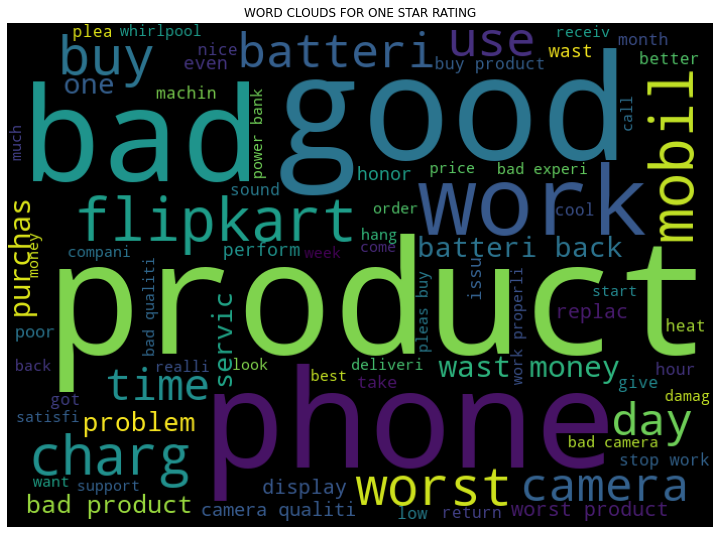

In [42]:
one_star = df['clean_review'][df['Rating']==1]
wordcloud = WordCloud(width=700,height=500,background_color='black',max_words=75).generate(' '.join(one_star))
plt.figure(figsize = (10,7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR ONE STAR RATING')
plt.show()


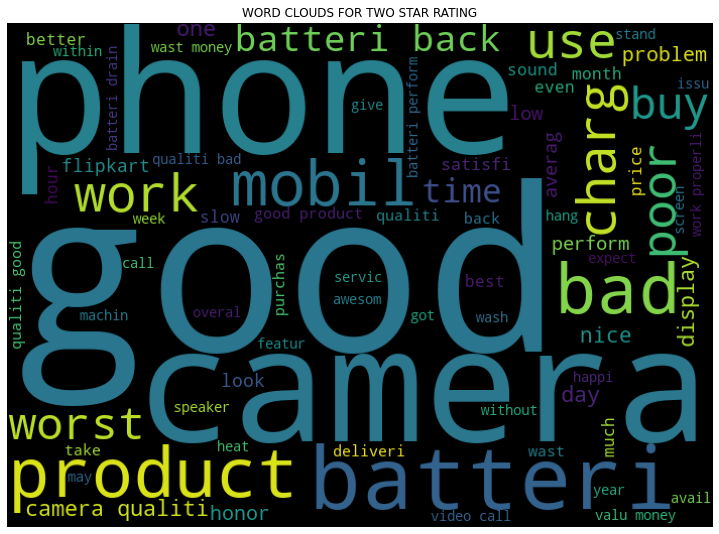

In [43]:
two_star = df['clean_review'][df['Rating']==2]
wordcloud = WordCloud(width=700,height=500,background_color='black',max_words=75).generate(' '.join(two_star))
plt.figure(figsize = (10,7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR TWO STAR RATING')
plt.show()

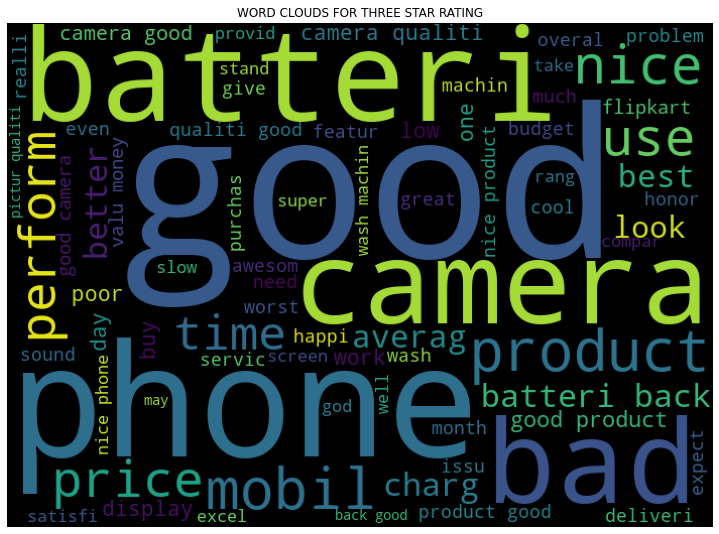

In [44]:
three_star = df['clean_review'][df['Rating']==3]
wordcloud = WordCloud(width=700,height=500,background_color='black',max_words=75).generate(' '.join(three_star))
plt.figure(figsize = (10,7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR THREE STAR RATING')
plt.show()

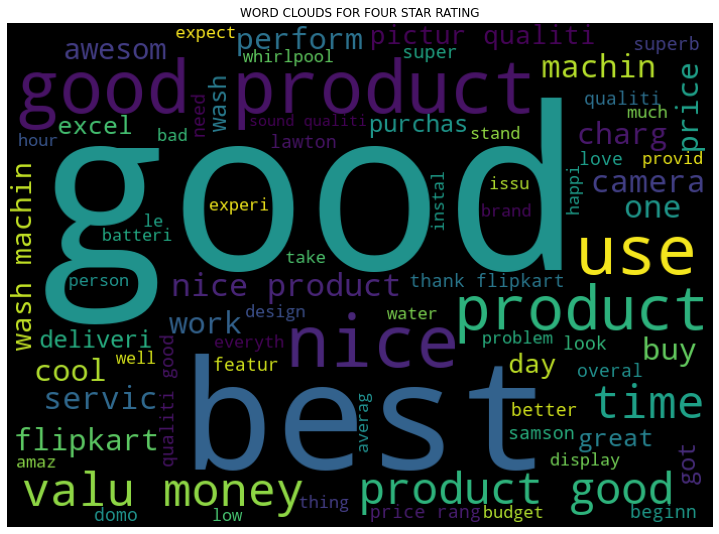

In [45]:
four_star = df['clean_review'][df['Rating']==4]
wordcloud = WordCloud(width=700,height=500,background_color='black',max_words=75).generate(' '.join(four_star))
plt.figure(figsize = (10,7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR FOUR STAR RATING')
plt.show()

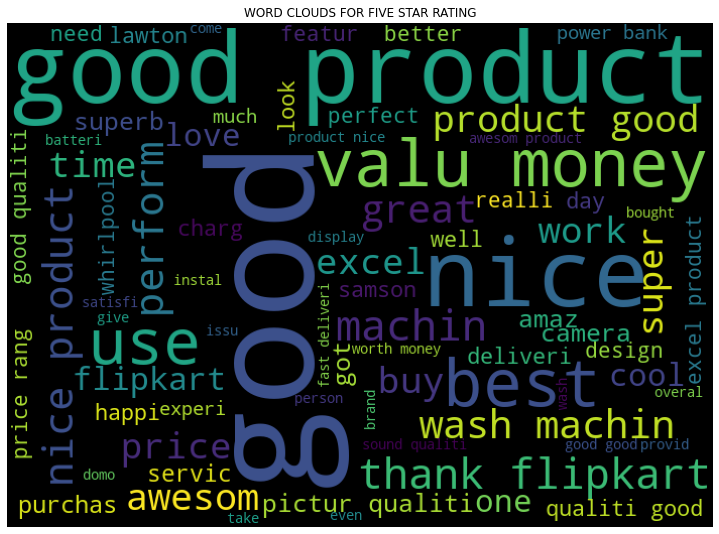

In [47]:
five_star = df['clean_review'][df['Rating']==5]
wordcloud = WordCloud(width=700,height=500,background_color='black',max_words=75).generate(' '.join(five_star))
plt.figure(figsize = (10,7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR FIVE STAR RATING')
plt.show()

# MODELLING

In [48]:
df.sample(4)

,Review,Rating,length,clean_length,clean_review,len of cleaned comment
4429,good machine nice design good washing programs...,5,67,64,good machin nice design good wash program wash...,56
6667,awesome please include sd card else clicked pi...,5,69,57,awesom pleas includ card els click pictur view,46
17563,battery back need,3,24,19,batteri back need,17
877,lawton fast worth every penny also sure after ...,5,413,257,lawton fast worth everi penni also sure turn w...,232


In [49]:
X=df.clean_review
y=df.Rating

In [50]:
X.head()

0    bit expens compar today inter gen dozen gen ba...
1    fantast valu money machin absolut beast far sh...
2    best get look perform notch suprem batteri lif...
3    ultim machin best lawton ever use hand malbroo...
4    everyon plan buy pro blaze fast ahead perform ...
Name: clean_review, dtype: object

In [51]:
y.head()

0    4
1    5
2    5
3    5
4    5
Name: Rating, dtype: int64

In [52]:
tfidf=tf(input='content', encoding='utf-8', lowercase=True,stop_words='english',max_features=10000,ngram_range=(1,3))

In [53]:
x=tfidf.fit_transform(X).toarray()

In [54]:
#CHECKING THE SELECTED FEATURE NAMES
tfidf.get_feature_names()[1:9]

['abl',
 'abl charg',
 'abl fix',
 'abl load',
 'abl use',
 'absent',
 'absolut',
 'absolut beast']

In [55]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=95)

In [57]:
print('shape of x_train:',x_train.shape,'\nshape of x_test:',x_test.shape)

print('shape of y_train:',y_train.shape,'\nshape of y_test:',y_test.shape)

shape of x_train: (13309, 10000) 
shape of x_test: (5704, 10000)
shape of y_train: (13309,) 
shape of y_test: (5704,)


# Model Building

In [68]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [69]:
# List of Models
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))


In [74]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state


In [ ]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  81 is: 0.5753856942496494


Learning Score :  0.6086107145540611
Accuracy Score :  0.5753856942496494
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.58      0.58       913
           2       0.00      0.00      0.00       403
           3       0.56      0.28      0.37       827
           4       0.21      0.01      0.01       964
           5       0.58      0.97      0.72      2597

    accuracy                           0.58      5704
   macro avg       0.39      0.37      0.34      5704
weighted avg       0.47      0.58      0.48      5704



Confusion Matrix:
 [[ 528    0   69    4  312]
 [ 156    0   75    2  170]
 [ 133    0  229    6  459]
 [  30    0   19    7  908]
 [  47    0   18   14 2518]]


*************************** DecisionTreeClassifier **************************